<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exercício-1---Notas" data-toc-modified-id="Exercício-1---Notas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exercício 1 - Notas</a></span><ul class="toc-item"><li><span><a href="#Explorando-Dados" data-toc-modified-id="Explorando-Dados-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Explorando Dados</a></span></li><li><span><a href="#Visualizando-Dados" data-toc-modified-id="Visualizando-Dados-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualizando Dados</a></span></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Medindo-Performance" data-toc-modified-id="Medindo-Performance-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Medindo Performance</a></span></li></ul></li><li><span><a href="#Exercício-2---Controle-da-Qualidade" data-toc-modified-id="Exercício-2---Controle-da-Qualidade-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercício 2 - Controle da Qualidade</a></span><ul class="toc-item"><li><span><a href="#Visualizando-Dados" data-toc-modified-id="Visualizando-Dados-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Visualizando Dados</a></span></li><li><span><a href="#Treinando-Modelo" data-toc-modified-id="Treinando-Modelo-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Treinando Modelo</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Regularization</a></span></li></ul></li></ul></div>

Este notebook tem por objetivo implementar soluções em ```Python``` para os exercícios propostos no curso ```Introdução à Machine Learning```, de Andrew Ng (Coursera).

# Exercício 1 - Notas

O dataset deste exerício contém notas de alunos em 2 exames e, como target, a definição se este passou ou não de ano.

## Explorando Dados

In [1]:
# Importando bibliotecas e lendo arquivo
import pandas as pd

df = pd.read_csv('ex2data1.csv')
df.head()

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


Aparentemente não colunas identificadoras dos atributos neste dataset. Vamos implementar.

In [3]:
# Alterando headers
df = pd.read_csv('ex2data1.csv', names=['exame_1', 'exame_2', 'resultado'])
df.head()

,exame_1,exame_2,resultado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
# Verificando informações adicionais
print(f'O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dataset possui 100 linhas e 3 colunas.


In [5]:
# Dados nulos?
df.isnull().any()

exame_1      False
exame_2      False
resultado    False
dtype: bool

In [6]:
# Tipos primitivos
df.dtypes

exame_1      float64
exame_2      float64
resultado      int64
dtype: object

In [7]:
# Infos detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
exame_1      100 non-null float64
exame_2      100 non-null float64
resultado    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [8]:
# Demais infos
df.describe()

,exame_1,exame_2,resultado
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## Visualizando Dados

In [11]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
# Testando operações antes da plotagem
df_pass = df.query('resultado == 1')
df_rec = df.query('resultado == 0')

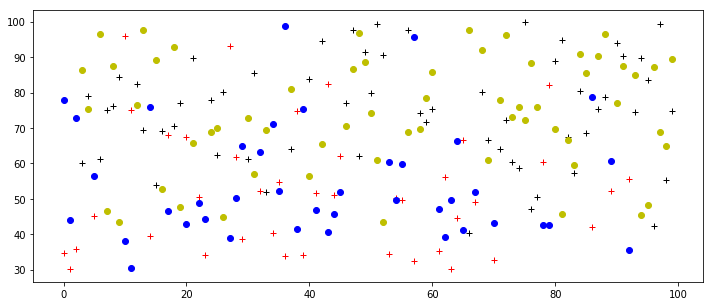

In [23]:
# Configurando plotagem
plt.figure(figsize=(12, 5));

plt.plot(df_pass['exame_1'], 'k+')
plt.plot(df_pass['exame_2'], 'yo')
plt.plot(df_rec['exame_1'], 'r+')
plt.plot(df_rec['exame_2'], 'bo')

plt.show()

In [30]:
df.index.where('resultado == 1')

ValueError: invalid literal for int() with base 10: 'resultado == 1'

In [34]:
help(pd.DataFrame.where)

Help on function where in module pandas.core.generic:

where(self, cond, other=nan, inplace=False, axis=None, level=None, errors='raise', try_cast=False, raise_on_error=None)
    Return an object of same shape as self and whose corresponding
    entries are from self where `cond` is True and otherwise are from
    `other`.
    
    Parameters
    ----------
    cond : boolean NDFrame, array-like, or callable
        Where `cond` is True, keep the original value. Where
        False, replace with corresponding value from `other`.
        If `cond` is callable, it is computed on the NDFrame and
        should return boolean NDFrame or array. The callable must
        not change input NDFrame (though pandas doesn't check it).
    
        .. versionadded:: 0.18.1
            A callable can be used as cond.
    
    other : scalar, NDFrame, or callable
        Entries where `cond` is False are replaced with
        corresponding value from `other`.
        If other is callable, it is compu

In [47]:
# Concluindo o pensamento
df_pass = df.where(df['resultado'] == 1).dropna()
df_pass.head()

,exame_1,exame_2,resultado
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0
6,61.106665,96.511426,1.0
7,75.024746,46.554014,1.0
8,76.098787,87.420570,1.0


In [48]:
# Concluindo o pensamento
df_rec = df.where(df['resultado'] == 0).dropna()
df_rec.head()

,exame_1,exame_2,resultado
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
5,45.083277,56.316372,0.0
10,95.861555,38.225278,0.0


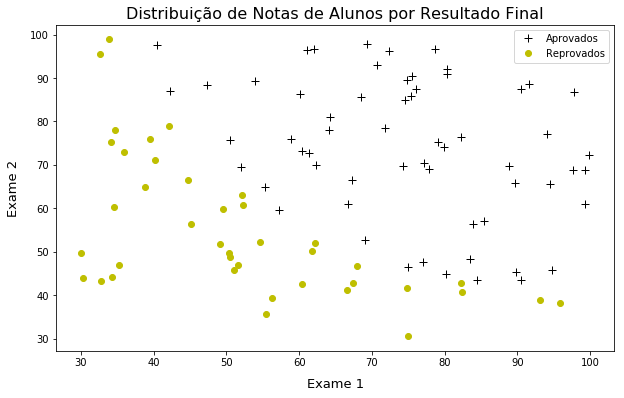

In [67]:
# Testando plotagem
plt.figure(figsize=(10, 6))
plt.plot(df_pass['exame_1'], df_pass['exame_2'], 'k+', label='Aprovados', markersize=8)
plt.plot(df_rec['exame_1'], df_rec['exame_2'], 'yo', label='Reprovados', markersize=6)
plt.title('Distribuição de Notas de Alunos por Resultado Final', size=16)
plt.xlabel('Exame 1', size=13, labelpad=10)
plt.ylabel('Exame 2', size=13, labelpad=10)
plt.legend()
plt.show()

## Treinando Modelo

In [68]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split

In [69]:
# Separando dados
X_train, X_test, y_train, y_test = train_test_split(df.drop('resultado', axis=1), 
                                                   df['resultado'], test_size=.2, random_state=42)

In [71]:
# Verificando
print(f'Linhas de X_train: {X_train.shape[0]}.')
print(f'Linhas de X_test: {X_test.shape[0]}.')
print(f'Linhas de y_train: {y_train.shape[0]}.')
print(f'Linhas de y_test: {y_test.shape[0]}.')

Linhas de X_train: 80.
Linhas de X_test: 20.
Linhas de y_train: 80.
Linhas de y_test: 20.


In [73]:
# Importando classificador LogisticRegression
from sklearn.linear_model import LogisticRegression

In [74]:
# Criando classificador e treinando modelo
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
# Predizendo valores
predictions = log_reg.predict(X_test)

## Medindo Performance

In [77]:
# Importando biblioteca e realizando medições
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       1.00      0.75      0.86         8
          1       0.86      1.00      0.92        12

avg / total       0.91      0.90      0.90        20



In [78]:
# Avaliando matriz de confusão
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

array([[ 6,  2],
       [ 0, 12]], dtype=int64)

A quantidade de dados deste dataset é ínfima. Trata-se de um problema teórico.

In [79]:
# Verificando coeficientes
log_reg.coef_

array([[0.03726846, 0.02503848]])

In [80]:
log_reg.intercept_

array([-3.4629012])

In [81]:
log_reg.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)>

In [83]:
log_reg.score(X_test, y_test)

0.9

# Exercício 2 - Controle da Qualidade

In [107]:
# Importando biblioteca e lendo arquivo
import pandas as pd

df_chip = pd.read_csv('ex2data2.csv')
df_chip.head()

,0.051267,0.69956,1
0,-0.092742,0.68494,1
1,-0.213710,0.69225,1
2,-0.375000,0.50219,1
3,-0.513250,0.46564,1
4,-0.524770,0.20980,1


As colunas deste dataset definem, respectivamente, o Teste nº 1, Teste nº 2 e, por fim, se o componente eletrônico foi aprovado ou reprovado no controle de qualidade.

In [108]:
# Lendo novament
df_chip = pd.read_csv('ex2data2.csv', names=['teste_1', 'teste_2', 'qa'])
df_chip.head()

,teste_1,teste_2,qa
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [109]:
# Informações
df_chip.shape

(118, 3)

## Visualizando Dados

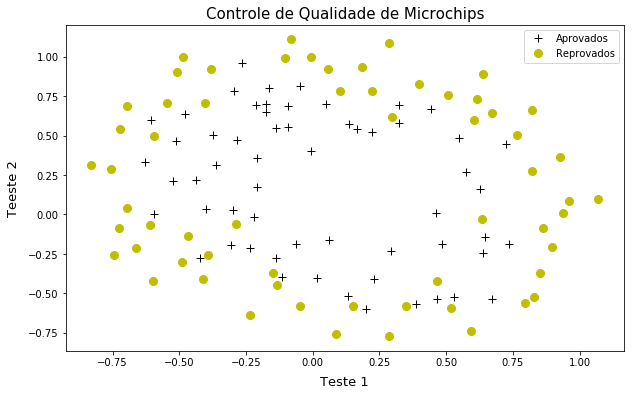

In [116]:
# Configurando plotagem
plt.figure(figsize=(10, 6))

df_chip_pass = df_chip.query('qa == 1')
df_chip_rep = df_chip.query('qa == 0')

plt.plot(df_chip_pass['teste_1'], df_chip_pass['teste_2'], 'k+', 
         markersize=8, label='Aprovados')
plt.plot(df_chip_rep['teste_1'], df_chip_rep['teste_2'], 'yo', 
         markersize=8, label='Reprovados')
plt.title('Controle de Qualidade de Microchips', size=15)
plt.xlabel('Teste 1', size=13, labelpad=8)
plt.ylabel('Teeste 2', size=13, labelpad=8)
plt.legend()
plt.show()

## Treinando Modelo

In [118]:
# Importando biblioteca
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [126]:
# Splitando dados, criando classificador, treinando modelo e predizendo dados
X_train, X_test, y_train, y_test = train_test_split(df_chip.drop('qa', axis=1),
                                                   df_chip['qa'], test_size=.3, random_state=42)

log_reg_chip = LogisticRegression()
log_reg_chip.fit(X_train, y_train)

predictions = log_reg_chip.predict(X_test)

In [127]:
# Visualizando performance
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.43      0.56      0.49        16
          1       0.53      0.40      0.46        20

avg / total       0.49      0.47      0.47        36



In [128]:
confusion_matrix(y_test, predictions)

array([[ 9,  7],
       [12,  8]], dtype=int64)

O treinamento apenas com o classificador ```LogisticRegression``` apresentou resultados muito ruins. Neste ponto, entra a ```Regularização``` dos parâmetros para melhorar a performance.

## Regularization

Aumentando o grau polinomial da base de dados.

In [130]:
# Visualizando
df_chip.head()

,teste_1,teste_2,qa
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Para a regularização, seria necessário aumentar o grau polinomial do DataFrame. Este procedimento foi realizado através do ```Octave``` e dpode ser verificado no respectivo notebook.